In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# FitBit Tracker Insights: Unveiling Trends in Wellness Technology Consumer Behavior

![](https://th.bing.com/th/id/R.a3e06837f29dd2f6ac5fffeb4dd76323?rik=TA3NHdXufVkT%2fA&pid=ImgRaw&r=0)

The Bellabeat case study presents a compelling opportunity to delve into the world of wellness technology and consumer behavior analysis. As a junior data analyst at Bellabeat, I'll be tasked with unraveling trends in smart device usage, particularly focusing on how consumers interact with non-Bellabeat smart devices. Through this analysis, I aim to unearth insights that can inform Bellabeat's marketing strategy, helping the company capitalize on growth opportunities in the global smart device market.

Employing a structured approach encompassing the data analysis process stages of ask, prepare, process, analyze, share, and act, I will navigate through the dataset, extract meaningful patterns, and translate them into actionable recommendations. With a meticulous eye for detail and a knack for storytelling through data, I will craft a comprehensive report containing clear summaries, detailed documentation, insightful visualizations, and high-level content recommendations.

By leveraging public data sources such as the FitBit Fitness Tracker Data and employing rigorous data cleaning and analysis techniques, I aim to provide Bellabeat with invaluable insights that can steer their marketing strategies towards success. As I embark on this capstone project, I look forward to honing my analytical skills, gaining practical experience, and delivering impactful results that contribute to Bellabeat's continued growth and success in the wellness technology industry.

In [2]:
# Load necessary libraries
library(tidyverse)
library(lubridate)  # For date manipulation
library(knitr)      # For better table presentation
library(ggplot2)    # For data visualization

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
base_path <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# Load and preprocess the data
daily_activity <- read_csv(file.path(base_path, "dailyActivity_merged.csv"))
daily_sleep <- read_csv(file.path(base_path, "sleepDay_merged.csv"))
weight_info <- read_csv(file.path(base_path, "weightLogInfo_merged.csv"))


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification fo

In [4]:
# Install and load the janitor package
install.packages("janitor")
library(janitor)

# Clean column names and convert to lowercase for daily_activity
daily_activity <- clean_names(daily_activity)
daily_activity <- rename_with(daily_activity, tolower)
head(daily_activity)

# Clean column names and convert to lowercase for daily_sleep
daily_sleep <- clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)
head(daily_sleep)

# Clean column names and convert to lowercase for weight_info
weight_info <- clean_names(weight_info)
weight_info <- rename_with(weight_info, tolower)
head(weight_info)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [5]:
# Clean and format date columns
daily_activity$date <- parse_date_time(daily_activity$activity_date, "%m/%d/%Y")
daily_activity$date <- date(daily_activity$date)
head(daily_activity)


daily_sleep$date_time <- parse_date_time(daily_sleep$sleep_day, "%m/%d/%Y %I:%M:%S %p")
daily_sleep$date <- date(daily_sleep$date_time)
head(daily_sleep)

weight_info$date_time <- parse_date_time(weight_info$date, "%m/%d/%Y %I:%M:%S %p")
weight_info$date <- date(weight_info$date_time)
head(weight_info)


id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,date_time,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<date>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,2016-04-12
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,2016-04-13
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,2016-04-15
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,2016-04-16
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,2016-04-17
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,2016-04-19


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,date_time
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dttm>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02 23:59:59
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03 23:59:59
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13 01:08:52
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,2016-04-21 23:59:59
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,2016-05-12 23:59:59
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,2016-04-17 23:59:59


In [6]:
library(dplyr)

# Drop the 'date_time' column from 'weight_info'
weight_info <- select(weight_info, -date_time)

# Drop the 'activity_date' column from 'daily_activity'
daily_activity <- select(daily_activity, -activity_date)

# Drop the 'sleep_day' and 'date_time' columns from 'daily_sleep'
daily_sleep <- select(daily_sleep, -sleep_day, -date_time)


In [7]:
# Merge datasets
merged_data <- merge(merge(daily_activity, daily_sleep, by = c("id", "date"), all = TRUE), weight_info, by = c("id", "date"), all = TRUE)
head(merged_data)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1985,1,327,346,NA,NA,NA,NA,NA,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,1797,2,384,407,NA,NA,NA,NA,NA,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,1776,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1745,1,412,442,NA,NA,NA,NA,NA,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,1863,2,340,367,NA,NA,NA,NA,NA,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1728,1,700,712,NA,NA,NA,NA,NA,NA


In [10]:
# Remove unnecessary columns
merged_data <- merged_data %>%
  select(-c("tracker_distance", "logged_activities_distance", "total_sleep_records", "weight_pounds", "fat", "bmi", "is_manual_report"))

head(merged_data)

`geom_smooth()` using formula = 'y ~ x'


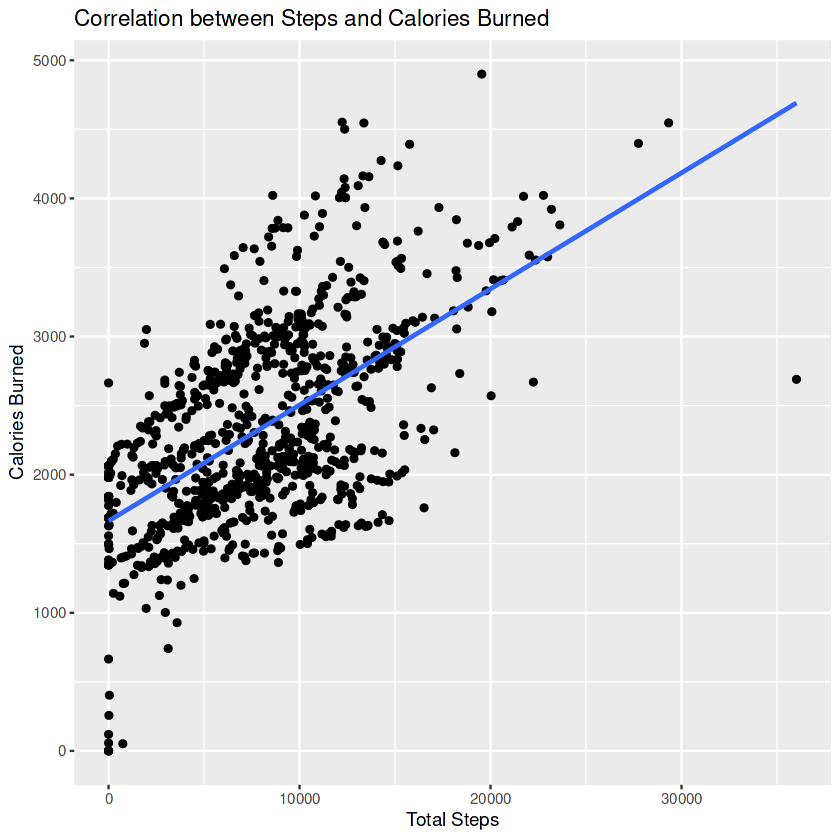

In [11]:
# Visualize correlations between variables
correlation_plot <- ggplot(merged_data, aes(x = total_steps, y = calories)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between Steps and Calories Burned",
       x = "Total Steps",
       y = "Calories Burned")

print(correlation_plot)

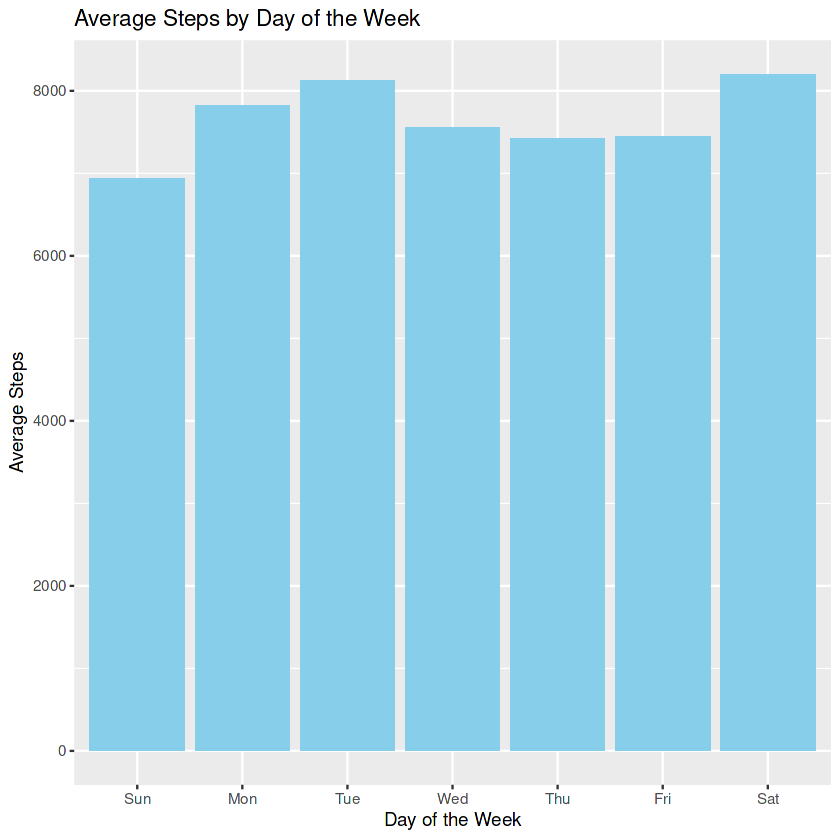

In [12]:
# Explore users' activity by day of the week
activity_by_day <- merged_data %>%
  mutate(weekday = wday(date, label = TRUE)) %>%
  group_by(weekday) %>%
  summarize(avg_steps = mean(total_steps, na.rm = TRUE))

# Visualize users' activity by day of the week
activity_by_day_plot <- ggplot(activity_by_day, aes(x = weekday, y = avg_steps)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Steps by Day of the Week",
       x = "Day of the Week",
       y = "Average Steps")

print(activity_by_day_plot)

In [ ]:
# Analyze sleep patterns
sleep_distribution <- merged_data %>%
  mutate(total_minutes_asleep_range = cut(total_minutes_asleep, breaks = c(0, 420, 540, Inf), labels = c("less than 7h", "7h to 9h", "more than 9h"))) %>%
  group_by(total_minutes_asleep_range) %>%
  summarize(count = n())

# Visualize sleep distribution
sleep_distribution_plot <- ggplot(sleep_distribution, aes(x = total_minutes_asleep_range, y = count)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Distribution of Sleep Duration",
       x = "Sleep Duration Range",
       y = "Count")

print(sleep_distribution_plot)

In [ ]:
# Explore the relationship between weight and activity
weight_vs_activity <- merged_data %>%
  group_by(id) %>%
  summarize(avg_weight = mean(weight_kg, na.rm = TRUE),
            avg_distance = mean(total_distance, na.rm = TRUE))

# Visualize weight vs activity
weight_vs_activity_plot <- ggplot(weight_vs_activity, aes(x = avg_weight, y = avg_distance)) +
  geom_point() +
  labs(title = "Average Weight vs Average Distance Covered",
       x = "Average Weight (kg)",
       y = "Average Distance Covered (miles)")

print(weight_vs_activity_plot)

In [ ]:
# Load necessary libraries
library(tidyverse)
library(lubridate)  # For date manipulation
library(knitr)      # For better table presentation
library(ggplot2)    # For data visualization

In [ ]:
# Hourly Activity Analysis
hourly_activity <- merged_data %>%
  mutate(hour = hour(datetime)) %>%
  group_by(hour) %>%
  summarize(avg_steps = mean(total_steps, na.rm = TRUE))

# Visualize hourly activity
hourly_activity_plot <- ggplot(hourly_activity, aes(x = hour, y = avg_steps)) +
  geom_line() +
  labs(title = "Average Steps by Hour of the Day",
       x = "Hour of the Day",
       y = "Average Steps")

print(hourly_activity_plot)

In [ ]:
# Goal Achievement Analysis
goal_achievement <- merged_data %>%
  mutate(goal_Achieved = ifelse(total_steps >= 10000, "Yes", "No")) %>%
  summarize(percentage_Achieved = mean(goal_Achieved == "Yes", na.rm = TRUE) * 100)

# Print additional analyses
print(paste0("Percentage of Users Achieving Daily Activity Goal: ", goal_achievement$Percentage_Achieved, "%"))


In [ ]:
# Comparison with Benchmarks (assuming 10000 steps as benchmark)
benchmark_comparison <- merged_data %>%
  mutate(above_benchmark = ifelse(total_steps >= 10000, "Yes", "No")) %>%
  summarize(percentage_above_benchmark = mean(above_benchmark == "Yes", na.rm = TRUE) * 100)

print(paste0("Percentage of Users Above 10,000 Steps Benchmark: ", benchmark_comparison$Percentage_Above_Benchmark, "%"))


In [ ]:
# User Segmentation
library(ggplot2)

# Create user segmentation data frame
user_segmentation <- merged_data %>%
  mutate(activity_Level = case_when(
    total_steps < 5000 ~ "Low",
    total_steps >= 5000 & total_steps < 10000 ~ "Moderate",
    total_steps >= 10000 ~ "High"
  ),
  Sleep_Duration = case_when(
    total_minutes_asleep < 420 ~ "Low",
    total_minutes_asleep >= 420 & total_minutes_asleep < 540 ~ "Moderate",
    total_minutes_asleep >= 540 ~ "High"
  ),
  Weight_Category = case_when(
    weight_kg < 60 ~ "Underweight",
    weight_kg >= 60 & weight_kg < 80 ~ "Normal",
    weight_kg >= 80 ~ "Overweight"
  ))

# Plot stacked bar charts
plot_activity_level <- ggplot(user_segmentation, aes(x = activity_Level, fill = Sleep_Duration)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Activity Level and Sleep Duration",
       x = "Activity Level",
       y = "Count") +
  theme_minimal()

plot_sleep_duration <- ggplot(user_segmentation, aes(x = Sleep_Duration, fill = Weight_Category)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Sleep Duration and Weight Category",
       x = "Sleep Duration",
       y = "Count") +
  theme_minimal()

plot_weight_category <- ggplot(user_segmentation, aes(x = Weight_Category, fill = activity_Level)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Weight Category and Activity Level",
       x = "Weight Category",
       y = "Count") +
  theme_minimal()

# Print the plots
print(plot_activity_level)
print(plot_sleep_duration)
print(plot_weight_category)


In [ ]:
# Longitudinal Analysis
longitudinal_analysis <- merged_data %>%
  group_by(id) %>%
  summarize(start_date = min(date),
            end_date = max(date),
            total_steps = sum(total_steps, na.rm = TRUE),
            total_minutes_asleep = sum(total_minutes_asleep, na.rm = TRUE),
            avg_weight = mean(weight_kg, na.rm = TRUE))

print("Longitudinal Analysis:")
print(longitudinal_analysis)

In [ ]:
library(ggplot2)

# Create line plots for longitudinal analysis
plot_steps <- ggplot(merged_data, aes(x = date, y = total_steps)) +
  geom_line() +
  labs(title = "Total Steps Over Time",
       x = "Date",
       y = "Total Steps") +
  theme_minimal()

print(plot_steps)


In [ ]:
library(ggplot2)

# Create line plots for longitudinal analysis
plot_steps <- ggplot(longitudinal_analysis, aes(x = start_date, y = total_steps)) +
  geom_line() +
  labs(title = "Total Steps Over Time",
       x = "Date",
       y = "Total Steps") +
  theme_minimal()

plot_sleep <- ggplot(longitudinal_analysis, aes(x = start_date, y = total_minutes_asleep)) +
  geom_line() +
  labs(title = "Total Minutes Asleep Over Time",
       x = "Date",
       y = "Total Minutes Asleep") +
  theme_minimal()

plot_weight <- ggplot(longitudinal_analysis, aes(x = start_date, y = avg_weight)) +
  geom_line() +
  labs(title = "Average Weight Over Time",
       x = "Date",
       y = "Average Weight (kg)") +
  theme_minimal()

# Print the plots
print(plot_sleep)
print(plot_weight)


In [ ]:
hourlySteps$date_time <- parse_date_time(hourlySteps$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlySteps$hour <- hour(hourlySteps$date_time)
hourlySteps

In [ ]:
# Load required libraries
library(ggplot2)
library(dplyr)

# Load the data
base_path <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# Load and preprocess the data
hourlySteps <- read_csv(file.path(base_path, "hourlySteps_merged.csv"))
hourlyCalories <- read_csv(file.path(base_path, "hourlyCalories_merged.csv"))
hourlyIntensities <- read_csv(file.path(base_path, "hourlyIntensities_merged.csv"))


hourlySteps$DateTime <- parse_date_time(hourlySteps$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlySteps$Hour <- hour(hourlySteps$DateTime)

hourlyCalories$DateTime <- parse_date_time(hourlyCalories$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlyCalories$Hour <- hour(hourlyCalories$DateTime)

hourlyIntensities$DateTime <- parse_date_time(hourlyIntensities$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlyIntensities$Hour <- hour(hourlyIntensities$DateTime)


# Plot hourly steps over time
plot_steps <- ggplot(hourlySteps, aes(x = Hour, y = StepTotal)) +
  geom_line() +
  labs(title = "Hourly Steps Over Time",
       x = "Date Time",
       y = "Step Total") +
  theme_minimal()

print(plot_steps)

# Plot hourly calories over time
plot_calories <- ggplot(hourlyCalories, aes(x = Hour, y = Calories)) +
  geom_line() +
  labs(title = "Hourly Calories Over Time",
       x = "Date Time",
       y = "Calories") +
  theme_minimal()

print(plot_calories)

# Plot hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities, aes(x = Hour, y = TotalIntensity, y = AverageIntensity)) +
  geom_line() +
  labs(title = "Hourly Intensities Over Time",
       x = "Date Time",
       y = "Total Intensity") +
  theme_minimal()

print(plot_intensities)


In [ ]:
# Plot hourly steps over time
plot_steps <- ggplot(hourlySteps, aes(x = Hour, y = StepTotal)) +
  geom_line(color = "blue") +
  labs(title = "Hourly Steps Over Time",
       x = "Hour",
       y = "Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

# Plot hourly calories over time
plot_calories <- ggplot(hourlyCalories, aes(x = Hour, y = Calories)) +
  geom_line(color = "red") +
  labs(title = "Hourly Calories Over Time",
       x = "Hour",
       y = "Calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

# Plot hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities, aes(x = Hour, y = TotalIntensity)) +
  geom_line(color = "green", linetype = "dashed") +
  geom_line(aes(y = AverageIntensity), color = "blue", linetype = "dashed") +
  labs(title = "Hourly Intensities Over Time",
       x = "Hour",
       y = "Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  scale_linetype_manual(values = c("dashed", "dashed")) +
  scale_color_manual(values = c("green", "blue")) +
  guides(color = guide_legend(title = "Intensity", override.aes = list(linetype = c("dashed", "dashed"))))

print(plot_intensities)


In [ ]:
# Plot hourly steps over time
plot_steps <- ggplot(hourlySteps, aes(x = Hour, y = StepTotal)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Hourly Steps Over Time",
       x = "Hour",
       y = "Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

# Plot hourly calories over time
plot_calories <- ggplot(hourlyCalories, aes(x = Hour, y = Calories)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Hourly Calories Over Time",
       x = "Hour",
       y = "Calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

# Plot hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities, aes(x = Hour, y = TotalIntensity)) +
  geom_bar(stat = "identity", fill = "green") +
  geom_bar(aes(y = AverageIntensity), stat = "identity", fill = "blue") +
  labs(title = "Hourly Intensities Over Time",
       x = "Hour",
       y = "Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_intensities)


In [ ]:
# Calculate average steps per hour
hourlySteps_avg <- hourlySteps %>%
  group_by(Hour) %>%
  summarise(AvgStepTotal = mean(StepTotal))

# Plot average hourly steps over time
plot_steps <- ggplot(hourlySteps_avg, aes(x = Hour, y = AvgStepTotal)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Average Hourly Steps Over Time",
       x = "Hour",
       y = "Average Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

# Calculate average calories per hour
hourlyCalories_avg <- hourlyCalories %>%
  group_by(Hour) %>%
  summarise(AvgCalories = mean(Calories))

# Plot average hourly calories over time
plot_calories <- ggplot(hourlyCalories_avg, aes(x = Hour, y = AvgCalories)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Average Hourly Calories Over Time",
       x = "Hour",
       y = "Average Calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

# Calculate average intensities per hour
hourlyIntensities_avg <- hourlyIntensities %>%
  group_by(Hour) %>%
  summarise(AvgTotalIntensity = mean(TotalIntensity))
            
# Plot average hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities_avg, aes(x = Hour)) +
  geom_bar(aes(y = AvgTotalIntensity), stat = "identity", fill = "green", alpha = 0.5) +
  labs(title = "Average Hourly Intensities Over Time",
       x = "Hour",
       y = "Average Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_intensities)


In [ ]:
Type of users per activity level ¶
since we don't have any demographic variables from our sample we want to determine the type of users with the data we have. We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

Sedentary - Less than 5000 steps a day.
Lightly active - Between 5000 and 7499 steps a day.
Fairly active - Between 7500 and 9999 steps a day.
Very active - More than 10000 steps a day.

In [1]:
# Calculate daily total steps per user
daily_steps <- merged_data %>%
  group_by(id, date) %>%
  summarise(daily_total_steps = sum(total_steps))

# Classify users based on daily step count
daily_steps <- daily_steps %>%
  mutate(ActivityLevel = case_when(
    DailyTotalSteps < 5000 ~ "Sedentary",
    DailyTotalSteps >= 5000 & DailyTotalSteps < 7500 ~ "Lightly active",
    DailyTotalSteps >= 7500 & DailyTotalSteps < 10000 ~ "Fairly active",
    DailyTotalSteps >= 10000 ~ "Very active"
  ))

# Print a summary of user activity levels
activity_summary <- dailySteps %>%
  group_by(ActivityLevel) %>%
  summarise(Count = n())

print(activity_summary)


ERROR: Error in hourlySteps %>% group_by(Id, date(DateTime)) %>% summarise(DailyTotalSteps = sum(StepTotal)): could not find function "%>%"


In [13]:
library(dplyr)

# Assuming the merged data is stored in a dataframe named 'merged_data'

# Calculate daily total steps per user
dailySteps <- merged_data %>%
  group_by(id, date) %>%
  summarise(DailyTotalSteps = sum(total_steps, na.rm = TRUE))

# Classify users based on daily step count
dailySteps <- dailySteps %>%
  mutate(ActivityLevel = case_when(
    DailyTotalSteps < 5000 ~ "Sedentary",
    DailyTotalSteps >= 5000 & DailyTotalSteps < 7500 ~ "Lightly active",
    DailyTotalSteps >= 7500 & DailyTotalSteps < 10000 ~ "Fairly active",
    DailyTotalSteps >= 10000 ~ "Very active"
  ))

# Print a summary of user activity levels
activity_summary <- dailySteps %>%
  group_by(ActivityLevel) %>%
  summarise(Count = n())

print(activity_summary)


`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


# A tibble: 4 × 2
  ActivityLevel  Count
  <chr>          <int>
1 Fairly active    162
2 Lightly active   171
3 Sedentary        303
4 Very active      304


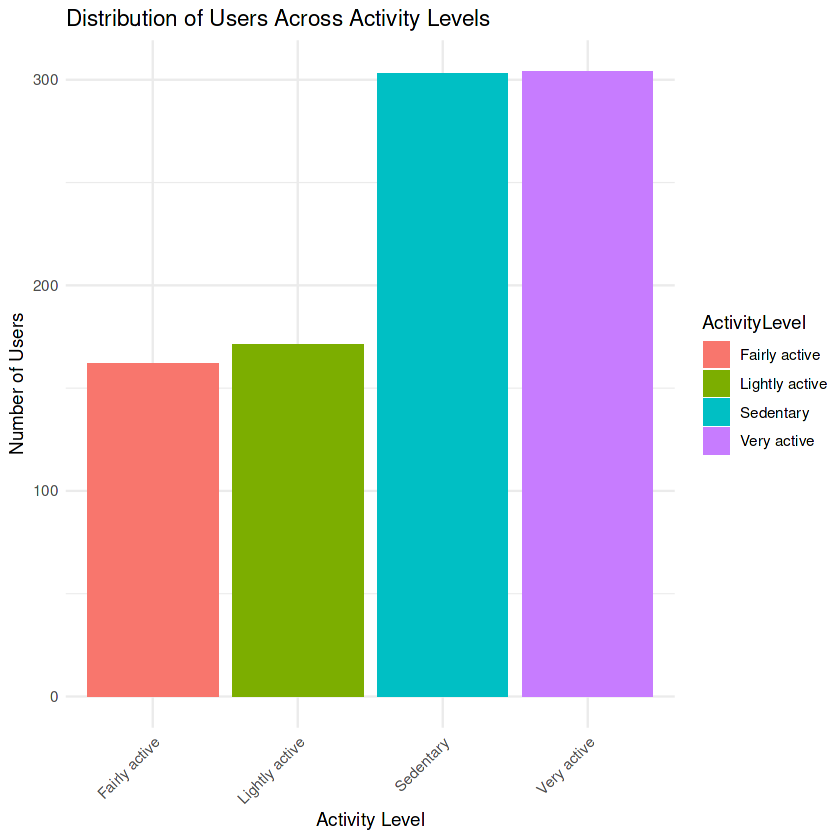

In [14]:
library(ggplot2)

# Plot the distribution of users across activity levels
activity_plot <- ggplot(activity_summary, aes(x = ActivityLevel, y = Count, fill = ActivityLevel)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Users Across Activity Levels",
       x = "Activity Level",
       y = "Number of Users") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(activity_plot)


In [ ]:
We will calculate the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the date interval is 31 days:

high use - users who use their device between 21 and 31 days.
moderate use - users who use their device between 10 and 20 days.
low use - users who use their device between 1 and 10 days.

In [15]:
# Load required libraries
library(dplyr)

# Assuming you have a data frame named `merged_data` with columns `id` and `date` representing user IDs and the dates they used their smart device.

# 1. Calculate the number of days each user has used their smart device
user_device_usage <- merged_data %>%
  group_by(id) %>%
  summarise(days_used = n_distinct(date))

# 2. Classify users into categories
user_device_usage$category <- cut(user_device_usage$days_used, breaks = c(0, 10, 20, 31),
                                  labels = c("Low Use", "Moderate Use", "High Use"))

# 3. Count the number of users in each category
category_counts <- table(user_device_usage$category)

# Print the counts
print(category_counts)



     Low Use Moderate Use     High Use 
           1            3           29 


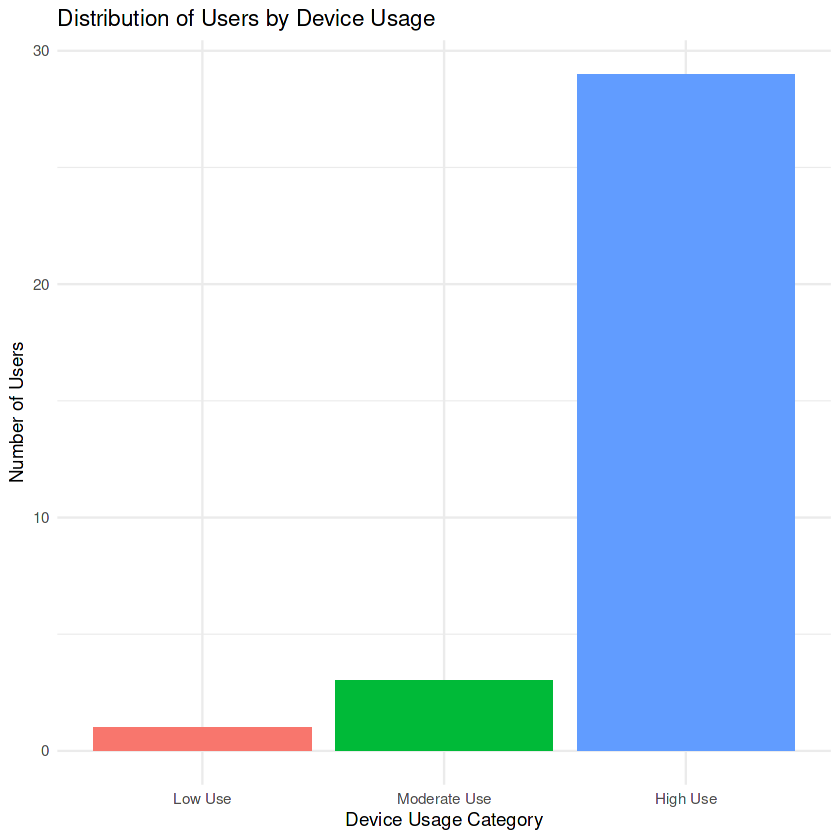

In [16]:
# Load required libraries
library(ggplot2)

# Assuming you have already calculated the category counts as `category_counts`

# Convert the category counts to a data frame
category_counts_df <- as.data.frame(category_counts)
names(category_counts_df) <- c("Category", "Count")

# Plotting the bar plot
bar_plot <- ggplot(category_counts_df, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Users by Device Usage",
       x = "Device Usage Category",
       y = "Number of Users") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove the legend

# Print the bar plot
print(bar_plot)


In [ ]:
We will now determine if there is any correlation between different variables:

Daily steps and daily sleep

In [ ]:
We need to create a new data frame calculating the total amount of minutes users wore the device every day and creating three different categories:

All day - device was worn all day.
More than half day - device was worn more than half of the day.
Less than half day - device was worn less than half of the day.

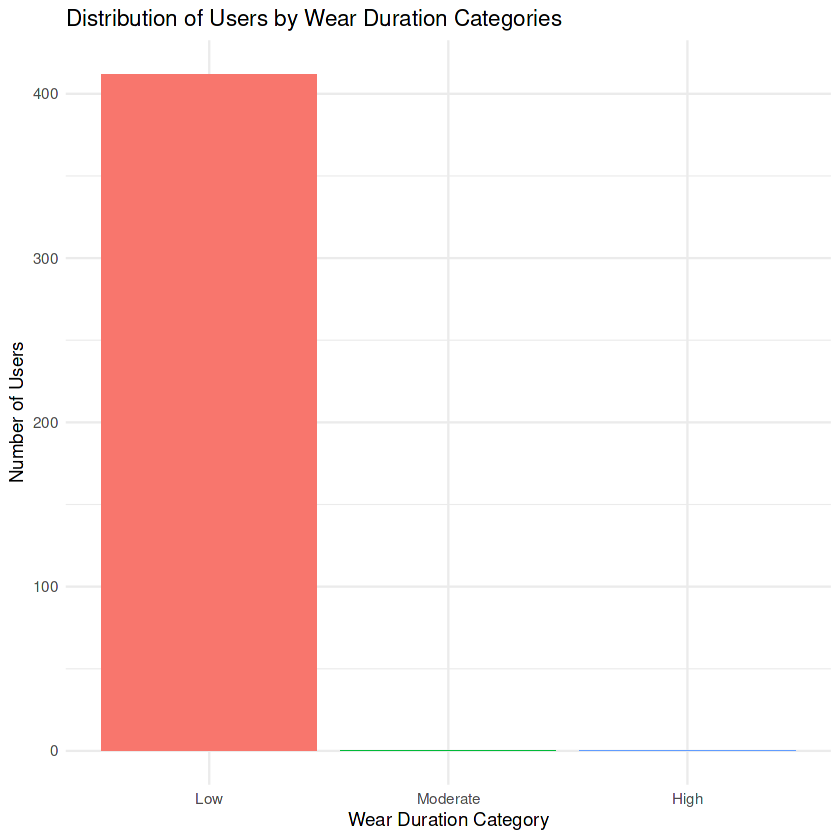

In [17]:
# Assuming you have the merged data loaded and it's named `merged_data`

# Step 1: Calculate total minutes users wore the device each day
merged_data$total_wear_minutes <- merged_data$total_time_in_bed - merged_data$total_minutes_asleep

# Step 2: Create categories based on wear durations
merged_data$wear_category <- cut(merged_data$total_wear_minutes,
                                  breaks = c(0, 480, 720, Inf),  # Define breaks for categories
                                  labels = c("Low", "Moderate", "High"))  # Labels for categories

# Step 3: Plotting the distribution of wear categories
# Convert the wear category counts to a data frame
wear_category_counts <- table(merged_data$wear_category)
wear_category_counts_df <- as.data.frame(wear_category_counts)
names(wear_category_counts_df) <- c("Wear_Category", "Count")

# Plotting the bar plot
wear_bar_plot <- ggplot(wear_category_counts_df, aes(x = Wear_Category, y = Count, fill = Wear_Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Users by Wear Duration Categories",
       x = "Wear Duration Category",
       y = "Number of Users") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove the legend

# Print the bar plot
print(wear_bar_plot)


In [ ]:
Remove duplicates and N/A

In [19]:
colnames(merged_data)

[1] "id"                         "date"                      
 [3] "total_steps"                "total_distance"            
 [5] "very_active_distance"       "moderately_active_distance"
 [7] "light_active_distance"      "sedentary_active_distance" 
 [9] "very_active_minutes"        "fairly_active_minutes"     
[11] "lightly_active_minutes"     "sedentary_minutes"         
[13] "calories"                   "total_minutes_asleep"      
[15] "total_time_in_bed"          "weight_kg"                 
[17] "log_id"                     "total_wear_minutes"        
[19] "wear_category"

Warning message:
“Removed 530 rows containing non-finite values (`stat_bin()`).”


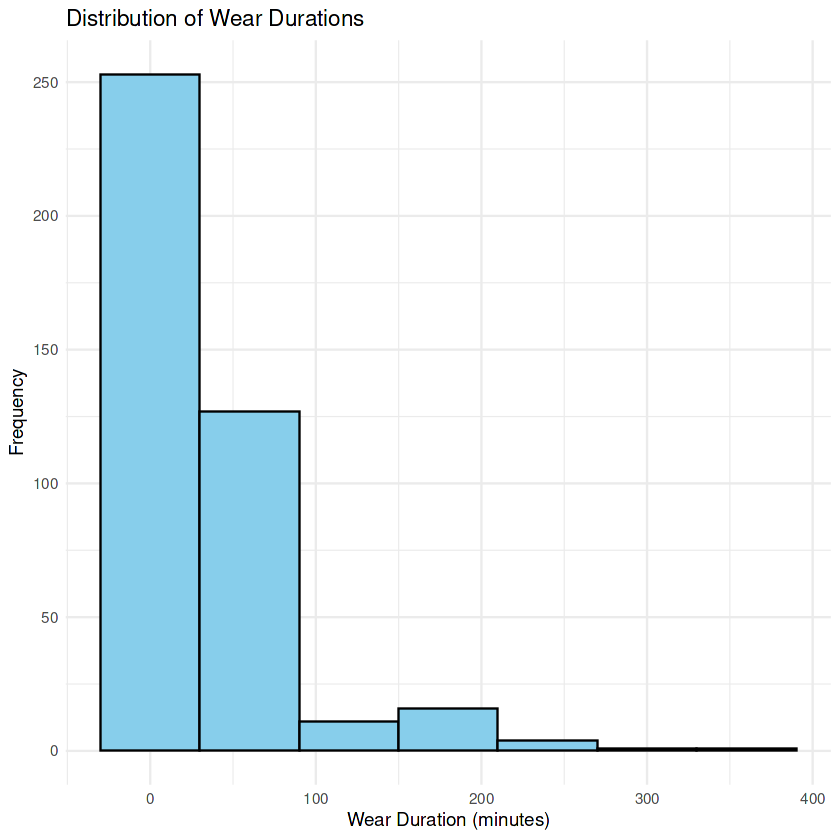

In [26]:
# Load required libraries
library(ggplot2)
library(dplyr)

# Assuming 'wear_duration' is a column representing wear durations in minutes in your dataset

# Plot histogram of wear durations
ggplot(data = merged_data, aes(x = total_wear_minutes)) +
  geom_histogram(binwidth = 60, fill = "skyblue", color = "black") +  # Adjust binwidth as needed
  labs(title = "Distribution of Wear Durations",
       x = "Wear Duration (minutes)",
       y = "Frequency") +
  theme_minimal()


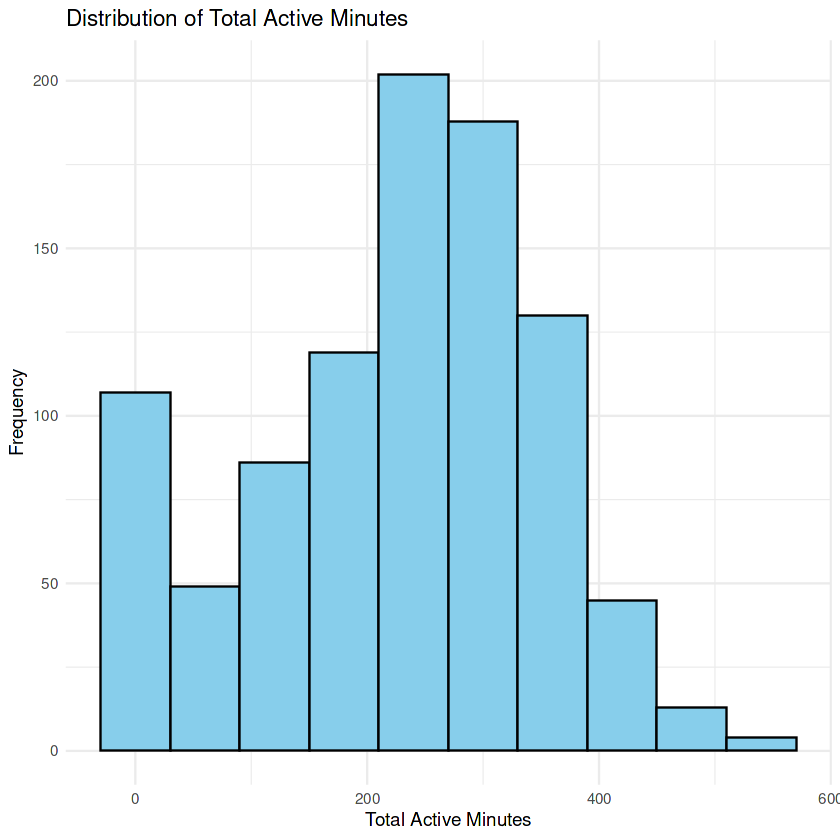

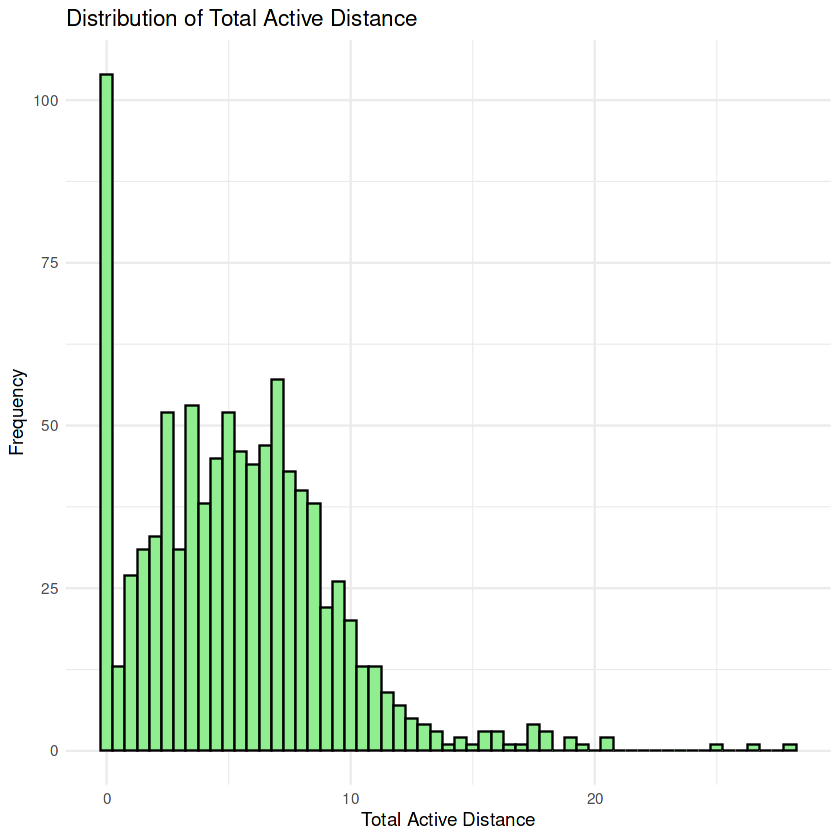

In [28]:
# Load required libraries
library(ggplot2)
library(dplyr)

# Assuming 'your_data' is your dataset containing the columns mentioned

# Calculate total for related columns
your_data <- merged_data %>%
  mutate(total_active_minutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes,
         total_active_distance = very_active_distance + moderately_active_distance + light_active_distance)

# Plot suitable graphs for the calculated totals

# Histogram of total active minutes
ggplot(data = your_data, aes(x = total_active_minutes)) +
  geom_histogram(binwidth = 60, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Active Minutes",
       x = "Total Active Minutes",
       y = "Frequency") +
  theme_minimal()

# Histogram of total active distance
ggplot(data = your_data, aes(x = total_active_distance)) +
  geom_histogram(binwidth = 0.5, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Total Active Distance",
       x = "Total Active Distance",
       y = "Frequency") +
  theme_minimal()


Warning message in geom_bar(binwidth = 60, fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`”


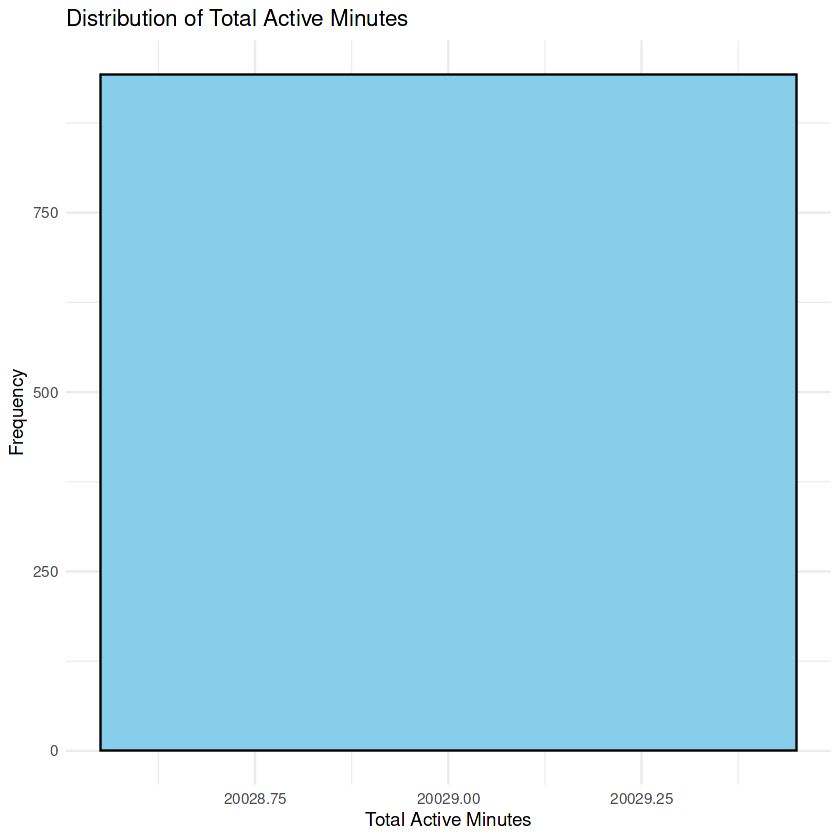

In [31]:
# Load required libraries
library(ggplot2)
library(dplyr)

# Assuming 'your_data' is your dataset containing the columns mentioned

# Calculate total for related columns
your_data <- merged_data %>%
  mutate(total_active_minutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes,
         total_active_distance = very_active_distance + moderately_active_distance + light_active_distance)

# Plot suitable graphs for the calculated totals

# Histogram of total active minutes
ggplot(data = merged_data, aes(x = sum(very_active_minutes))) +
  geom_bar(binwidth = 60, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Active Minutes",
       x = "Total Active Minutes",
       y = "Frequency") +
  theme_minimal()


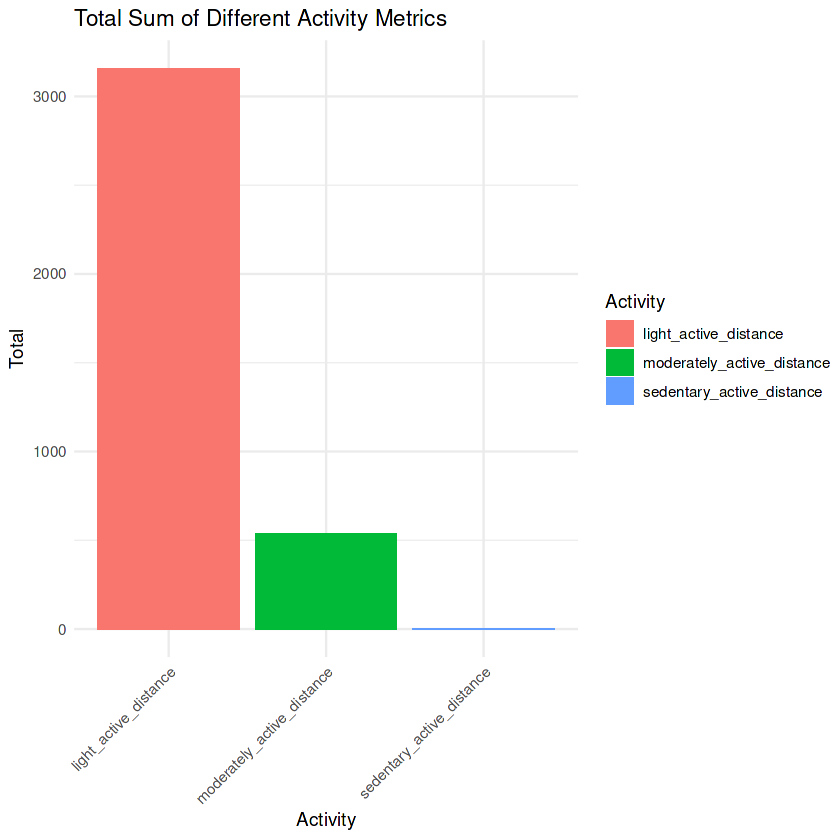

In [33]:
# Calculate sums of different columns
sums <- your_data %>%
  summarise(
            very_active_distance = sum(very_active_distance),
            moderately_active_distance = sum(moderately_active_distance),
            light_active_distance = sum(light_active_distance),
            sedentary_active_distance = sum(sedentary_active_distance))

# Reshape the data for plotting
sums <- tidyr::pivot_longer(sums, cols = -1, names_to = "Activity", values_to = "Total")

# Plot the bar chart
ggplot(data = sums, aes(x = Activity, y = Total, fill = Activity)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sum of Different Activity Metrics",
       x = "Activity",
       y = "Total",
       fill = "Activity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


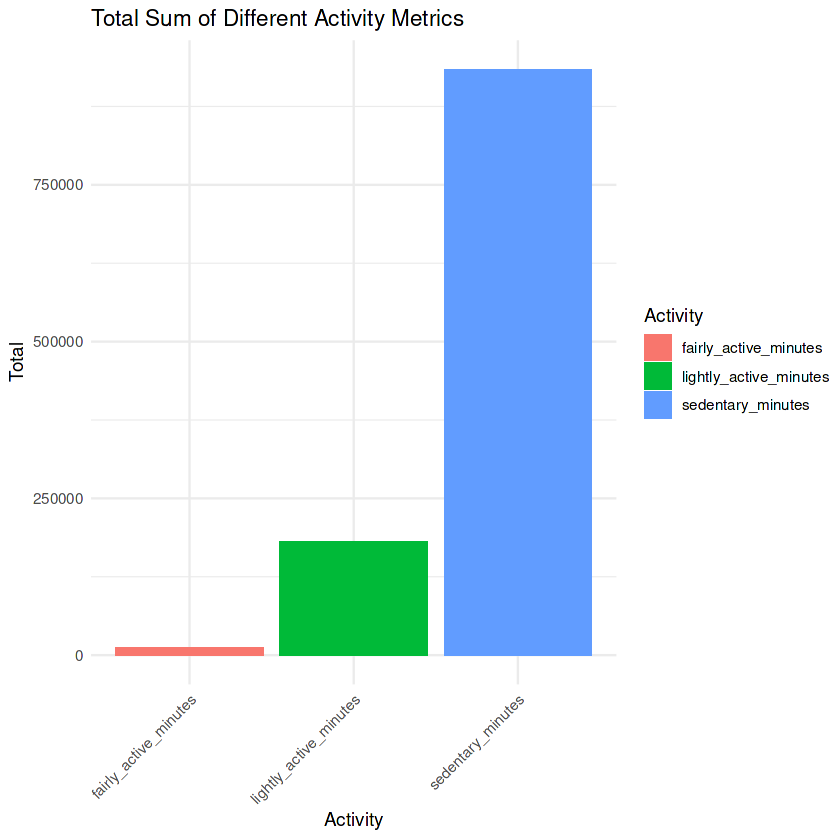

In [34]:
# Calculate sums of different columns
sums <- your_data %>%
  summarise(very_active_minutes = sum(very_active_minutes),
            fairly_active_minutes = sum(fairly_active_minutes),
            lightly_active_minutes = sum(lightly_active_minutes),
            sedentary_minutes = sum(sedentary_minutes))

# Reshape the data for plotting
sums <- tidyr::pivot_longer(sums, cols = -1, names_to = "Activity", values_to = "Total")

# Plot the bar chart
ggplot(data = sums, aes(x = Activity, y = Total, fill = Activity)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sum of Different Activity Metrics",
       x = "Activity",
       y = "Total",
       fill = "Activity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [35]:
correlation_matrix <- cor(merged_data[, c("total_steps", "total_distance", "very_active_minutes", "very_active_distance", "calories", "total_minutes_asleep", "total_time_in_bed")])
print(correlation_matrix)


                     total_steps total_distance very_active_minutes
total_steps            1.0000000      0.9853685           0.6650712
total_distance         0.9853685      1.0000000           0.6791623
very_active_minutes    0.6650712      0.6791623           1.0000000
very_active_distance   0.7388049      0.7927490           0.8263566
calories               0.5929493      0.6466023           0.6157735
total_minutes_asleep          NA             NA                  NA
total_time_in_bed             NA             NA                  NA
                     very_active_distance  calories total_minutes_asleep
total_steps                     0.7388049 0.5929493                   NA
total_distance                  0.7927490 0.6466023                   NA
very_active_minutes             0.8263566 0.6157735                   NA
very_active_distance            1.0000000 0.4910190                   NA
calories                        0.4910190 1.0000000                   NA
total_minutes_asle

In [37]:
# Calculate correlation matrix
correlation_matrix <- cor(merged_data[, c("total_steps", "total_distance", "very_active_minutes", "very_active_distance", "calories", "total_minutes_asleep", "total_time_in_bed")])

# Plot heatmap
heatmap(correlation_matrix, 
        col = colorRampPalette(c("blue", "white", "red"))(20),
        main = "Correlation Heatmap")


ERROR: Error in hclustfun(distfun(x)): NA/NaN/Inf in foreign function call (arg 10)
